In [3]:
# imporing necessary packages
import pandas as pd
import numpy as np
import sympy.mpmath as math
import matplotlib.pyplot as plt
%matplotlib inline

In [194]:
# Paramertization of the model

rmax = 0.22
kn = 1.1*10**(-2)
qp = 0.08
qz = 0.04
b = 0.7
gmax = .12
Iv = 1.4*10**(-2)
dep = 20
sp = 3.0*10**(-12)
sz = 1.5*10**(-11)
umax = 1.4*10**(-11)
ks = 0.5
kp = 2.0*10**7
ss = 0.05

In [195]:
# defining the parameterization equations
def h(t):
    return (4-2*math.cos((2*math.pi/365)*(t+10)))
def dl(t):
    return (12-4*math.cos((2*math.pi/365)*(t+10)))
def r(t):
    return (924.7-400*math.cos((2*math.pi/365)*(t-18964)))
def sr(r, h, dl):
    return r*(h/dl)
def sun(sr):
    return sr/(100+sr)
def cz(p):
    return p/(kp+p) #gmax*(1-(math.e)**(-Iv*p))
def cp(n):
    return n/(kn+n)
def st(t):
    return 10-2*math.cos((2*math.pi/365)*(t+10))
def sw(t):
    return 0.45+0.15*math.cos((2*math.pi/365)*(t+10))
def M(sw, st):
    return (2.5**(sw*st))/10000
def sep(n):
    if n >= 0.42:
        return 0
    else:
        return 1

    

# defining the differential n, p, z equations
def n_prime(cp, sun, M, sep):
  return  -p*sun*umax*cp + M*sep
def p_prime(n, p, z, cz, cp, sun):
  return (p*rmax*cp*sun)-(qp*p)-(gmax*cz*z)
def z_prime(p, z, cz):
  return (1-b)*gmax*cz*z-qz*z 

#initial values
t = 0
t_i = 0.1
p = 1.0*10**8
z = 50
n = 0.42

# Creating an array for the output values differential equation
t_array = []
p_array = []
z_array = []
n_array = []

while t <= 400:
  t = t + t_i
  new_n = n_prime(cp(n), sun(sr(r(t), h(t), dl(t))), M(sw(t), st(t)), sep(n))*t_i + n
  new_p = p_prime(n, p, z, cz(p), cp(n), sun(sr(r(t), h(t), dl(t))))*t_i + p
  new_z = z_prime(p, z, cz(p))*t_i + z
  p, z, n = new_p, new_z, new_n
  t_array.append(t)
  p_array.append(p)
  z_array.append(z)
  n_array.append(n)

output = {'time': t_array, 'phytoplankton': p_array, 'zooplankton': z_array, 'nitrogen': n_array}
print(output)



{'nitrogen': [mpf('0.41992138085183306'), mpf('0.42065539054693707'), mpf('0.42057604841233587'), mpf('0.42049634374910477'), mpf('0.42041627458949027'), mpf('0.42033583895284349'), mpf('0.42025503484552801'), mpf('0.42017386026082704'), mpf('0.4200923131788501'), mpf('0.42001039156643855'), mpf('0.41992809337707088'), mpf('0.42065838007127115'), mpf('0.42057531843610707'), mpf('0.42049187393203086'), mpf('0.42040804445748026'), mpf('0.42032382789703931'), mpf('0.42023922212133913'), mpf('0.42015422498695759'), mpf('0.42006883433631881'), mpf('0.41998304799759134'), mpf('0.42070979961988453'), mpf('0.42062321106071543'), mpf('0.4205362201368027'), mpf('0.42044882461759986'), mpf('0.4203610222577796'), mpf('0.42027281079712747'), mpf('0.42018418796043472'), mpf('0.42009515145739024'), mpf('0.42000569898247203'), mpf('0.41991582821483742'), mpf('0.42063843380174193'), mpf('0.4205477149480506'), mpf('0.42045657066748826'), mpf('0.42036499857611198'), mpf('0.42027299627409154'), mpf('0.420

In [196]:
output_df = pd.DataFrame(output)
output_df.to_csv('output.csv')

In [197]:
npz_model = pd.read_csv('output.csv', sep=',')
npz_model.head()

,Unnamed: 0,nitrogen,phytoplankton,time,zooplankton
0,0,0.419921,1.004354e+08,0.1,49.950000
1,1,0.420655,1.008730e+08,0.2,49.900158
2,2,0.420576,1.013129e+08,0.3,49.850474
3,3,0.420496,1.017549e+08,0.4,49.800948
4,4,0.420416,1.021990e+08,0.5,49.751577


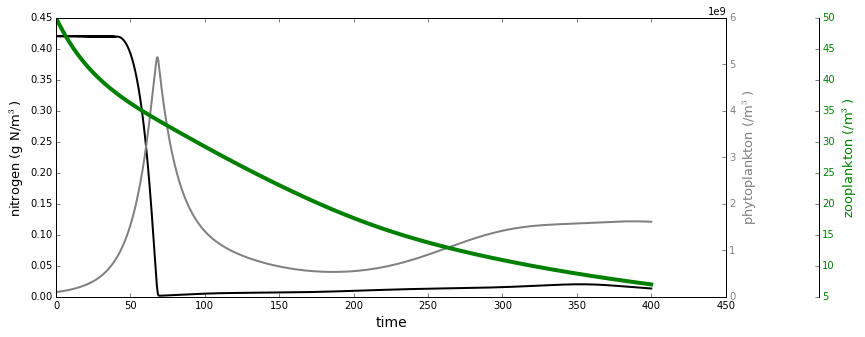

In [198]:
fig = plt.figure(figsize=(12, 5))

# layering the three axes, which contain the three varaibles, on top of one another to create a single subplot
# layering completed with twinx() method
ax1 = plt.subplot()
ax2 = ax1.twinx()
ax3 = ax1.twinx()

# plotting the 3 variables into the predetermined plot outlined above
# Setting the color and width of lines on the graph
ax1.plot(npz_model.time, npz_model.nitrogen, 'k-', linewidth =2)
ax2.plot(npz_model.time, npz_model.phytoplankton, 'grey', linewidth=2)
ax3.plot(npz_model.time, npz_model.zooplankton, 'g-', linewidth=4)
    
# moving the spine that the zooplankton was plotted onto towards the right so it isnt on top of the second spine(ax2)
npz_model.zooplankton_spine = ax3.spines['right']
npz_model.zooplankton_spine.set_position(('axes', 1.14))

# Adjusting the color of the axes ticks to match line color
ax1.yaxis.set_tick_params(labelcolor='k')
ax2.yaxis.set_tick_params(labelcolor='grey')
ax3.yaxis.set_tick_params(labelcolor='green')
    
# Making axes labels, selecting their color, and selecting their size
ax1.set_xlabel(npz_model.time.name, fontsize=14, y=0)
ax1.set_ylabel(npz_model.nitrogen.name + ' (g N/m$^3$)', fontsize = 13, color ='k')
ax2.set_ylabel(npz_model.phytoplankton.name + ' (/m$^3$)', fontsize = 13, color='grey')
ax3.set_ylabel(npz_model.zooplankton.name + ' (/m$^3$)', fontsize = 13, color='g')

#ax1.set_ylim(0, 2.5)
#ax3.set_ylim(0, 2.5)
#ax2.set_ylim(0, 2.5)

plt.show()

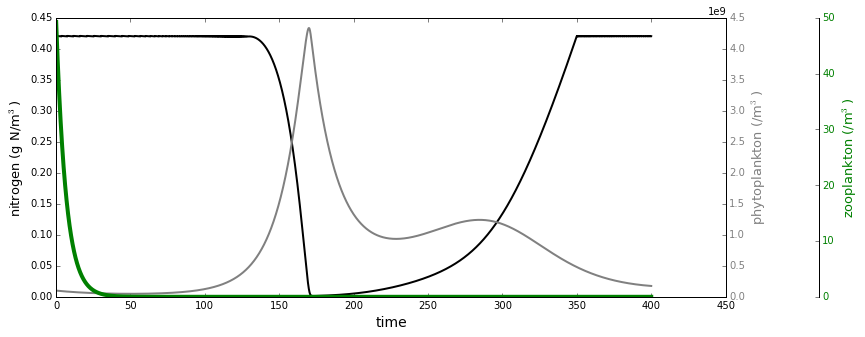

In [253]:
fig = plt.figure(figsize=(12, 5))

# layering the three axes, which contain the three varaibles, on top of one another to create a single subplot
# layering completed with twinx() method
ax1 = plt.subplot()
ax2 = ax1.twinx()
ax3 = ax1.twinx()

# plotting the 3 variables into the predetermined plot outlined above
# Setting the color and width of lines on the graph
ax1.plot(npz_model.time, npz_model.nitrogen, 'k-', linewidth =2)
ax2.plot(npz_model.time, npz_model.phytoplankton, 'grey', linewidth=2)
ax3.plot(npz_model.time, npz_model.zooplankton, 'g-', linewidth=4)
    
# moving the spine that the zooplankton was plotted onto towards the right so it isnt on top of the second spine(ax2)
npz_model.zooplankton_spine = ax3.spines['right']
npz_model.zooplankton_spine.set_position(('axes', 1.14))

# Adjusting the color of the axes ticks to match line color
ax1.yaxis.set_tick_params(labelcolor='k')
ax2.yaxis.set_tick_params(labelcolor='grey')
ax3.yaxis.set_tick_params(labelcolor='green')
    
# Making axes labels, selecting their color, and selecting their size
ax1.set_xlabel(npz_model.time.name, fontsize=14, y=0)
ax1.set_ylabel(npz_model.nitrogen.name + ' (g N/m$^3$)', fontsize = 13, color ='k')
ax2.set_ylabel(npz_model.phytoplankton.name + ' (/m$^3$)', fontsize = 13, color='grey')
ax3.set_ylabel(npz_model.zooplankton.name + ' (/m$^3$)', fontsize = 13, color='g')

#ax1.set_ylim(0, 2.5)
#ax3.set_ylim(0, 2.5)
#ax2.set_ylim(0, 2.5)

plt.show()

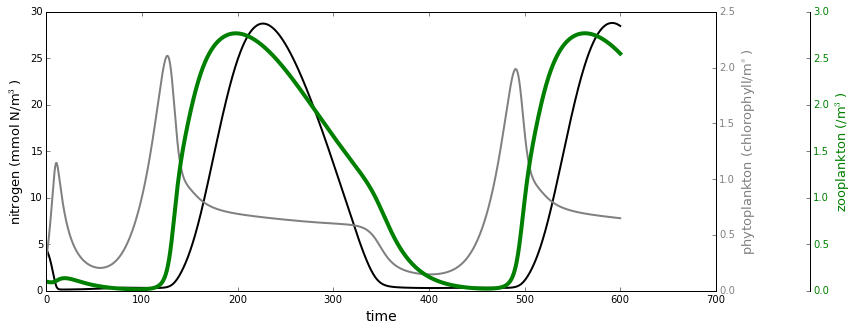

In [141]:
fig = plt.figure(figsize=(12, 5))

# layering the three axes, which contain the three varaibles, on top of one another to create a single subplot
# layering completed with twinx() method
ax1 = plt.subplot()
ax2 = ax1.twinx()
ax3 = ax1.twinx()

# plotting the 3 variables into the predetermined plot outlined above
# Setting the color and width of lines on the graph
ax1.plot(npz_model.time, npz_model.nitrogen, 'k-', linewidth =2)
ax2.plot(npz_model.time, npz_model.phytoplankton, 'grey', linewidth=2)
ax3.plot(npz_model.time, npz_model.zooplankton, 'g-', linewidth=4)
    
# moving the spine that the zooplankton was plotted onto towards the right so it isnt on top of the second spine(ax2)
npz_model.zooplankton_spine = ax3.spines['right']
npz_model.zooplankton_spine.set_position(('axes', 1.14))

# Adjusting the color of the axes ticks to match line color
ax1.yaxis.set_tick_params(labelcolor='k')
ax2.yaxis.set_tick_params(labelcolor='grey')
ax3.yaxis.set_tick_params(labelcolor='green')
    
# Making axes labels, selecting their color, and selecting their size
ax1.set_xlabel(npz_model.time.name, fontsize=14, y=0)
ax1.set_ylabel(npz_model.nitrogen.name + ' (mmol N/m$^3$)', fontsize = 13, color ='k')
ax2.set_ylabel(npz_model.phytoplankton.name + ' (chlorophyll/m$^s$)', fontsize = 13, color='grey')
ax3.set_ylabel(npz_model.zooplankton.name + ' (/m$^3$)', fontsize = 13, color='g')

#ax3.set_ylim(0,0.9)
#ax2.set_ylim(0, 0.9)

plt.show()

In [106]:
# Paramertization of the model

rmax = 2
kn = 1
qp = 0.1
qz = 0.2
b = 0.7
gmax = 1.5
Iv = 1
dep = 20

In [182]:
def cz(p):
    return gmax*Iv*p*(1-math.e**(-Iv*p))
def cp(n):
    return n/(kn+n)

# defining the differential n, p, z equations
def n_prime(n, p, z):
  return (qp*p) + (qz*z) + b*gmax*Iv*p*(1-math.e**(-Iv*p))*z - n/(kn+n)*p*rmax
def p_prime(n, p, z):
  return (rmax*p*n/(kn+n))-(qp*p)-(gmax*Iv*p*(1-math.e**(-Iv*p))*z)
def z_prime(p, z):
  return (1-b)*gmax*Iv*p*(1-math.e**(-Iv*p))*z-qz*z 

#initial values
t = 0
t_i = 0.1
p = 0.3
z = 0.1
n = 1.6

t_array = []
p_array = []
z_array = []
n_array = []

while t <= 50:
  t = t + t_i
  #new_r = r(p, t)
  #new_cz = cz(p)
  #new_cp = cp(n)
  new_n = n_prime(n, p, z)*t_i + n
  new_p = p_prime(n, p, z)*t_i + p
  new_z = z_prime(p, z)*t_i + z
  p, z, n = new_p, new_z, new_n
  #r, cz, cp = new_r, new_cz, new_cp
  t_array.append(t)
  p_array.append(p)
  z_array.append(z)
  n_array.append(n)

output = {'time': t_array, 'phytoplankton': p_array, 'zooplankton': z_array, 'nitrogen': n_array}
print(output)




{'nitrogen': [mpf('1.5833514018205079'), mpf('1.5658725609267139'), mpf('1.5475350389992166'), mpf('1.5283110681419345'), mpf('1.5081738286995487'), mpf('1.4870977630101572'), mpf('1.4650589278709869'), mpf('1.4420353884205079'), mpf('1.4180076559707957'), mpf('1.3929591720313146'), mpf('1.3668768403152538'), mpf('1.3397516078711744'), mpf('1.3115790955877153'), mpf('1.2823602771213827'), mpf('1.2521022037334395'), mpf('1.2208187705214792'), mpf('1.1885315170199851'), mpf('1.1552704520474766'), mpf('1.1210748889277011'), mpf('1.0859942727575129'), mpf('1.050088976214959'), mpf('1.0134310345299922'), mpf('0.97610478378833143'), mpf('0.93820735992982152'), mpf('0.89984900901134945'), mpf('0.86115315309960505'), mpf('0.82225615134104468'), mpf('0.78330669338098646'), mpf('0.74446476367462933'), mpf('0.70590012184199502'), mpf('0.66779025760881106'), mpf('0.63031780040001106'), mpf('0.5936673941259033'), mpf('0.55802208695075306'), mpf('0.52355933221955242'), mpf('0.49044674673670097'), mp

In [220]:

rmax = 1
kn = 1
qp = 0.2
qz = 0.1
b = 0.7
gmax = 1
Iv = 0.84
dep = 20

In [225]:
# defining the parameterization equations
def r(p, t):
    return (12-4*math.cos((2*math.pi/365)*(t+10)))/24*(10**(-0.1*0.007*p*dep))
def cz(p):
    return gmax*(1-(math.e)**(-Iv*p))
def cp(n):
    return n/(kn+n)
def st(t):
    return 10-2*math.cos((2*math.pi/365)*(t+10))
def sw(t):
    return 0.45-0.15*math.cos((2*math.pi/365)*(t+10))
def M(sw, st):
    return (2.5**(sw*st))/1000


# defining the differential n, p, z equations
def n_prime(n, p, z, cz, cp, r, M):
  return (qp*p) + (qz*z) + b*cz*z - p*rmax*cp + M
def p_prime(n, p, z, r, cz, cp):
  return (p*rmax*cp*r)-(qp*p)-(cz*z)
def z_prime(p, z, cz):
  return (1-b)*cz*z-qz*z 

#initial values
t = 0
t_i = 0.1
p = 0.1
z = 0.3
n = 4.5

# Creating an array for the output values differential equation
t_array = []
p_array = []
z_array = []
n_array = []

while t <= 600:
  t = t + t_i
  new_n = n_prime(n, p, z, cz(p), cp(n), r(p, t), M(sw(t), st(t)))*t_i + n
  new_p = p_prime(n, p, z, r(p, t), cz(p), cp(n))*t_i + p
  new_z = z_prime(p, z, cz(p))*t_i + z
  p, z, n = new_p, new_z, new_n
  t_array.append(t)
  p_array.append(p)
  z_array.append(z)
  n_array.append(n)

output = {'time': t_array, 'phytoplankton': p_array, 'zooplankton': z_array, 'nitrogen': n_array}
print(output)




{'nitrogen': [mpf('4.499434572683505'), mpf('4.4989109157072997'), mpf('4.4984274150651506'), mpf('4.4979825095463166'), mpf('4.4975746889441419'), mpf('4.4972024923257878'), mpf('4.4968645063611703'), mpf('4.496559363709201'), mpf('4.4962857414594657'), mpf('4.4960423596275234'), mpf('4.4958279797020442'), mpf('4.4956414032420557'), mpf('4.4954814705226092'), mpf('4.4953470592272158'), mpf('4.4952370831854616'), mpf('4.4951504911542477'), mpf('4.4950862656411452'), mpf('4.4950434217684068'), mpf('4.4950210061762164'), mpf('4.4950180959638093'), mpf('4.4950337976671237'), mpf('4.4950672462717112'), mpf('4.495117604259649'), mpf('4.4951840606892635'), mpf('4.4952658303064936'), mpf('4.4953621526867762'), mpf('4.4954722914063669'), mpf('4.4955955332420485'), mpf('4.495731187398218'), mpf('4.4958785847603737'), mpf('4.4960370771740648'), mpf('4.49620603674839'), mpf('4.4963848551831749'), mpf('4.4965729431189772'), mpf('4.496769729509114'), mpf('4.4969746610129153'), mpf('4.49718720140945

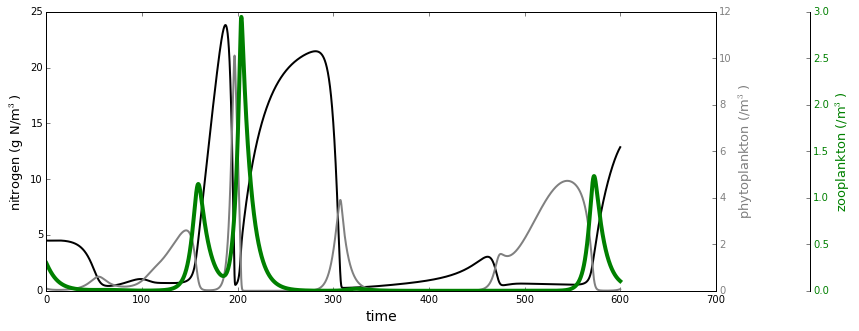

In [228]:
fig = plt.figure(figsize=(12, 5))

# layering the three axes, which contain the three varaibles, on top of one another to create a single subplot
# layering completed with twinx() method
ax1 = plt.subplot()
ax2 = ax1.twinx()
ax3 = ax1.twinx()

# plotting the 3 variables into the predetermined plot outlined above
# Setting the color and width of lines on the graph
ax1.plot(npz_model.time, npz_model.nitrogen, 'k-', linewidth =2)
ax2.plot(npz_model.time, npz_model.phytoplankton, 'grey', linewidth=2)
ax3.plot(npz_model.time, npz_model.zooplankton, 'g-', linewidth=4)
    
# moving the spine that the zooplankton was plotted onto towards the right so it isnt on top of the second spine(ax2)
npz_model.zooplankton_spine = ax3.spines['right']
npz_model.zooplankton_spine.set_position(('axes', 1.14))

# Adjusting the color of the axes ticks to match line color
ax1.yaxis.set_tick_params(labelcolor='k')
ax2.yaxis.set_tick_params(labelcolor='grey')
ax3.yaxis.set_tick_params(labelcolor='green')
    
# Making axes labels, selecting their color, and selecting their size
ax1.set_xlabel(npz_model.time.name, fontsize=14, y=0)
ax1.set_ylabel(npz_model.nitrogen.name + ' (g N/m$^3$)', fontsize = 13, color ='k')
ax2.set_ylabel(npz_model.phytoplankton.name + ' (/m$^3$)', fontsize = 13, color='grey')
ax3.set_ylabel(npz_model.zooplankton.name + ' (/m$^3$)', fontsize = 13, color='g')

#ax1.set_ylim(0, 2.5)
#ax3.set_ylim(0, 2.5)
#ax2.set_ylim(0, 2.5)

plt.show()

In [173]:
h = (4-2*math.cos((2*math.pi/365)*(t+10)))
dl = (12-4*math.cos((2*math.pi/365)*(t+10)))
r = (924.7-400*math.cos((2*math.pi/365)*(t-18964)))
sr = r*(H/D)

In [174]:
t=200
PAR_r

mpf('468.05183437858955')